    Importing Libraries and Data:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("Job-History-Export.csv")

    Preprocessing and Basic EDA:

In [3]:
df.head()

Pickup Date                 Customer Name  \
0   10/2/2018 9:00                     Emerge180   
1  10/2/2018 10:00                 Deliver Media   
2  10/2/2018 10:30           Greatlakes Advisors   
3   10/2/2018 9:00  TouchPoint Medical - Douglas   
4  10/2/2018 11:00     Disability Rights Florida   

                     Customer Email Customer Notes  \
0     lchristopherson@emerge180.com            NaN   
1      Mike.rumore@delivermedia.com            NaN   
2      rcook@greatlakesadvisors.com            NaN   
3         mmendez@touchpointmed.com            NaN   
4  zoer@disabilityrightsflorida.org            NaN   

                                          Address   Latitude  Longitude  \
0         13902 N Dale Mabry Hwy Suite 229, Tampa  28.072789 -82.507805   
1  3903 Northdale Blvd #280Tampa, Tampa, FL 33624  28.095117 -82.507505   
2          7650 West Courtney Campbell, Tampa, FL  27.966524 -82.567540   
3           114 Douglas Rd E\r\nOldsmar, FL 34677  28.041956 -82.663466   
4       1000 N Ashley Dr., Suite 640\r\nTampa, FL  27.952094 -82.462287   

         Contact Name          Contact Phone           Driver  ...  \
0  Lee Christopherson                    NaN  Unassigned Jobs  ...   
1         Mike Rumore             8632791383  Unassigned Jobs  ...   
2          Randy Cook                    NaN  Unassigned Jobs  ...   
3            Jim Hill                    NaN    Devin Edwards  ...   
4          Zoe Reeber  850-488-9071 ext 9763  Unassigned Jobs  ...   

  Unnamed: 15 Unnamed: 16 Unnamed: 17 Unnamed: 18 Unnamed: 19  Unnamed: 20  \
0         NaN         NaN         NaN         NaN         NaN          NaN   
1         NaN         NaN         NaN         NaN         NaN          NaN   
2         NaN         NaN         NaN         NaN         NaN          NaN   
3         NaN         NaN         NaN         NaN         NaN          NaN   
4         NaN         NaN         NaN         NaN         NaN          NaN   

   Unnamed: 21 Unnamed: 22 Unnamed: 23 Unnamed: 24  
0          NaN         NaN         NaN         NaN  
1          NaN         NaN         NaN         NaN  
2          NaN         NaN         NaN         NaN  
3          NaN         NaN         NaN         NaN  
4          NaN         NaN         NaN         NaN  

[5 rows x 25 columns]

In [4]:
df.columns

Index(['Pickup Date', 'Customer Name', 'Customer Email', 'Customer Notes',
       'Address', 'Latitude', 'Longitude', 'Contact Name', 'Contact Phone',
       'Driver', 'Warehouse Location', 'Job Description', 'Job #',
       'Job Category', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24'],
      dtype='object')

In [3]:
df.drop(columns=["Customer Name", 'Customer Notes', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', "Contact Phone", "Address", "Warehouse Location", "Customer Email", "Driver", "Job #"], inplace=True)
df.head()

Pickup Date   Latitude  Longitude        Contact Name  \
0   10/2/2018 9:00  28.072789 -82.507805  Lee Christopherson   
1  10/2/2018 10:00  28.095117 -82.507505         Mike Rumore   
2  10/2/2018 10:30  27.966524 -82.567540          Randy Cook   
3   10/2/2018 9:00  28.041956 -82.663466            Jim Hill   
4  10/2/2018 11:00  27.952094 -82.462287          Zoe Reeber   

                                     Job Description Job Category  
0                                           18 CPU's   COMMERCIAL  
1                                        15 desktops   COMMERCIAL  
2  6 Desktops - 1 server - one monitor - external...   COMMERCIAL  
3                                               Misc   COMMERCIAL  
4                   Chairs; television; file cabinet   COMMERCIAL

In [4]:
items = ["Desktop", "VCR/DVD", "Electronics", "Phones", "Computers", "Battery backups", "Printers", "Keyboards", "Misc items", "Monitors", "Television", "UPS", "Notebook", "Garmin", "laptop", "hard drive", "copier", "xerox", "battery", "CPU", "missile", "LCD", "Microwave", "Scanner", "hardrives", "HDD", "mac", "Display", "Dell", "Batteries", "cables", "speakers", "phones", "modem"]

In [5]:
len(items)

34

In [5]:
columns_to_include = ["Pickup Date", "Latitude", "Longitude", "Contact Name", "Job Category"]

# Create an empty DataFrame to store the extracted items with the required columns
extracted_df = pd.DataFrame(columns=["Item"] + columns_to_include)

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    # Check each item in the 'Job Description' column for the current row
    found_items = [item for item in items if pd.notna(row['Job Description']) and item.lower() in row['Job Description'].lower()]

    # If any items are found, create a row in the extracted DataFrame for each item
    for item in found_items:
        new_row = {"Item": item}
        for col in columns_to_include:
            new_row[col] = row[col]
        extracted_df = pd.concat([extracted_df, pd.DataFrame([new_row])], ignore_index=True)

extracted_df

C:\Users\hp\AppData\Local\Temp\ipykernel_16696\1631772395.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  extracted_df = pd.concat([extracted_df, pd.DataFrame([new_row])], ignore_index=True)


Item      Pickup Date   Latitude  Longitude  \
0             CPU   10/2/2018 9:00  28.072789 -82.507805   
1         Desktop  10/2/2018 10:00  28.095117 -82.507505   
2         Desktop  10/2/2018 10:30  27.966524 -82.567540   
3      hard drive  10/2/2018 10:30  27.966524 -82.567540   
4      Television  10/2/2018 11:00  27.952094 -82.462287   
...           ...              ...        ...        ...   
45730      cables    8/1/2023 8:00  28.024129 -82.122991   
45731      Phones   8/1/2023 10:00  28.008062 -81.728226   
45732      laptop   8/1/2023 10:00  28.008062 -81.728226   
45733      phones   8/1/2023 10:00  28.008062 -81.728226   
45734     missile    8/1/2023 9:30  28.641781 -81.412227   

                      Contact Name Job Category  
0               Lee Christopherson   COMMERCIAL  
1                      Mike Rumore   COMMERCIAL  
2                       Randy Cook   COMMERCIAL  
3                       Randy Cook   COMMERCIAL  
4                       Zoe Reeber   COMMERCIAL  
...                            ...          ...  
45730          Nini Johanna Cadena   COMMERCIAL  
45731               Amanda Kilgore   COMMERCIAL  
45732               Amanda Kilgore   COMMERCIAL  
45733               Amanda Kilgore   COMMERCIAL  
45734  Juan Rivera / Hector / Alan   COMMERCIAL  

[45735 rows x 6 columns]

- iterates over each row in the DataFrame (df) and searches for specific items mentioned in the 'Job Description' column.
- creates a new DataFrame (extracted_df) containing the extracted items along with other relevant columns specified in columns_to_include. 
- This process helps filter and extract important information from the original dataset for further analysis.

In [6]:
df = extracted_df.copy()

    Preprocessing, Data Analysis and Trends Comparison

In [7]:
extracted_df.dropna(inplace=True)

In [8]:
df['Pickup Date'] = pd.to_datetime(df['Pickup Date'])
df.head()

Item         Pickup Date   Latitude  Longitude        Contact Name  \
0         CPU 2018-10-02 09:00:00  28.072789 -82.507805  Lee Christopherson   
1     Desktop 2018-10-02 10:00:00  28.095117 -82.507505         Mike Rumore   
2     Desktop 2018-10-02 10:30:00  27.966524 -82.567540          Randy Cook   
3  hard drive 2018-10-02 10:30:00  27.966524 -82.567540          Randy Cook   
4  Television 2018-10-02 11:00:00  27.952094 -82.462287          Zoe Reeber   

  Job Category  
0   COMMERCIAL  
1   COMMERCIAL  
2   COMMERCIAL  
3   COMMERCIAL  
4   COMMERCIAL

In [9]:
print(df.describe())

df['Item'].value_counts()
df['Job Category'].value_counts()

                         Pickup Date      Latitude     Longitude
count                          45735  43449.000000  43449.000000
mean   2021-08-14 12:20:02.951787520     27.975223    -82.263423
min              2018-10-02 09:00:00    -33.826265   -122.473587
25%              2020-07-20 10:00:00     27.871585    -82.538323
50%              2021-10-20 08:30:00     27.975057    -82.456906
75%              2022-10-28 14:15:00     28.081204    -82.005770
max              2023-08-01 13:00:00     53.397604    151.200602
std                              NaN      0.740306      1.468516


Job Category
COMMERCIAL                                                     32377
RESIDENTIAL                                                    12020
DROP OFF                                                          79
Please also send Cert to Chris Bashaw @ cbashaw@vptitle.net        3
Name: count, dtype: int64

Item
laptop             5289
Monitors           4778
Computers          3518
Printers           3364
missile            2934
Desktop            2789
phones             2357
Phones             2357
UPS                2061
hard drive         2052
cables             1923
Keyboards          1583
battery            1448
Batteries          1360
Electronics        1275
mac                1031
HDD                 849
copier              785
LCD                 759
Battery backups     604
Scanner             576
speakers            466
Dell                431
CPU                 347
modem               234
Misc items          213
Microwave           149
Display              77
xerox                35
Television           25
Notebook             21
hardrives            20
Garmin               14
VCR/DVD              11
Name: count, dtype: int64


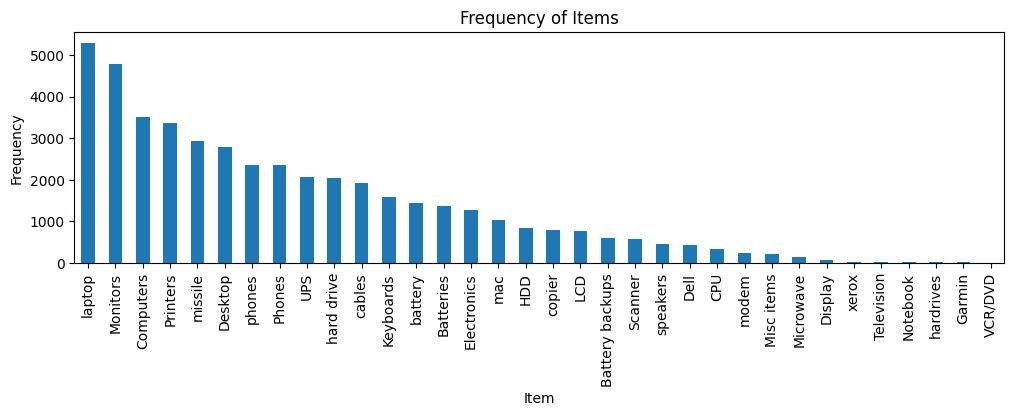

In [10]:
# Frequency of items
item_frequency = df['Item'].value_counts()
print(item_frequency)

# Plotting the frequency of items
import matplotlib.pyplot as plt

item_frequency.plot(kind='bar', figsize=(12, 3), title='Frequency of Items')
plt.xlabel('Item')
plt.ylabel('Frequency')
plt.show()

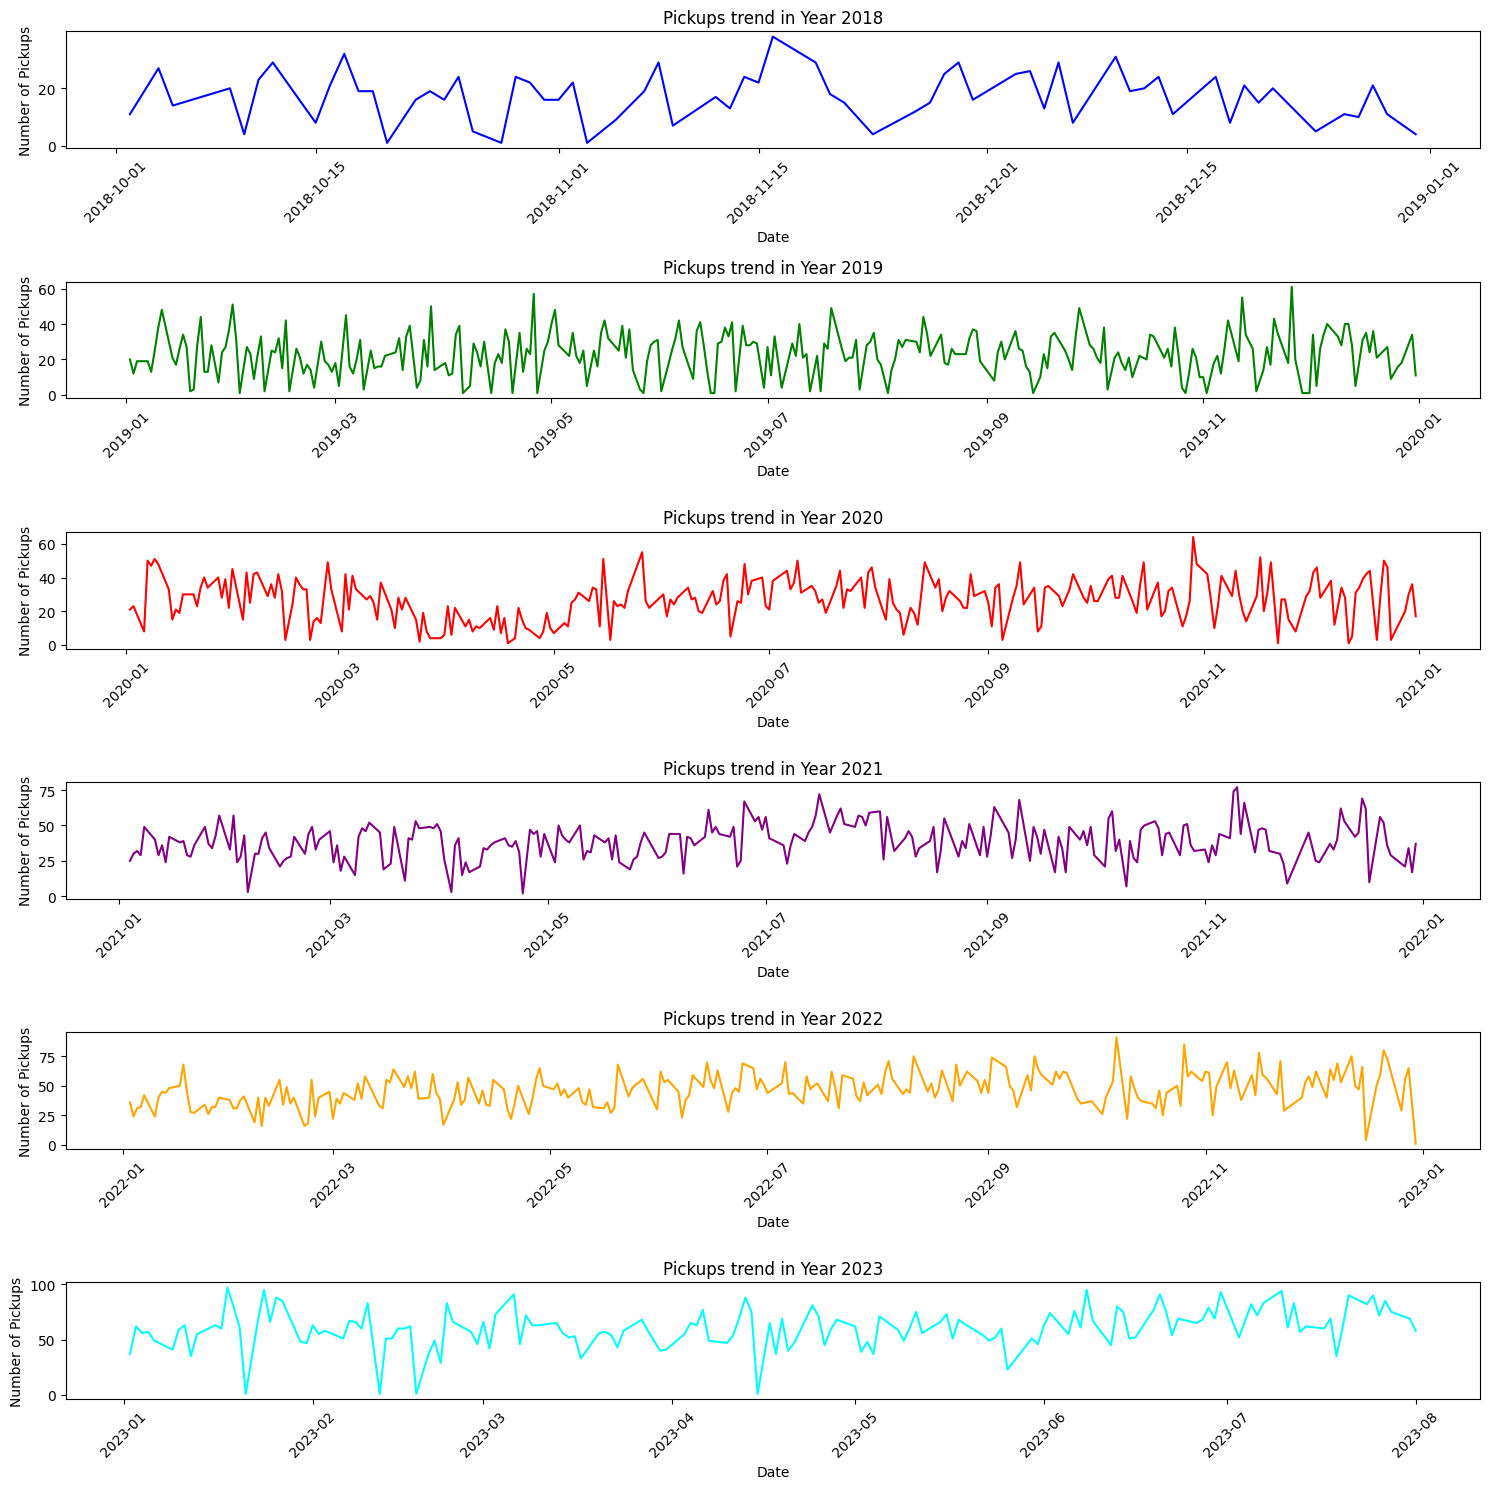

In [11]:
# Extract the year for grouping
df['Year'] = df['Pickup Date'].dt.year
df['Date'] = df['Pickup Date'].dt.date

# Create a plot for each year
years = df['Year'].unique()
num_years = len(years)

plt.figure(figsize=(15, 15))

# Define a list of colors
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']

for i, year in enumerate(sorted(years)):
    plt.subplot(num_years, 1, i + 1)
    yearly_data = df[df['Year'] == year].groupby('Date').size()
    sns.lineplot(x=yearly_data.index, y=yearly_data.values, color=colors[i % len(colors)])
    plt.title(f'Pickups trend in Year {year}')
    plt.xlabel('Date')
    plt.ylabel('Number of Pickups')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


- Extracts and groups pickup data by year to visualize trends.
- Creates individual plots for each year, showing pickup trends.
- Utilizes distinct colors to differentiate between years for easy comparison.

    Clustering

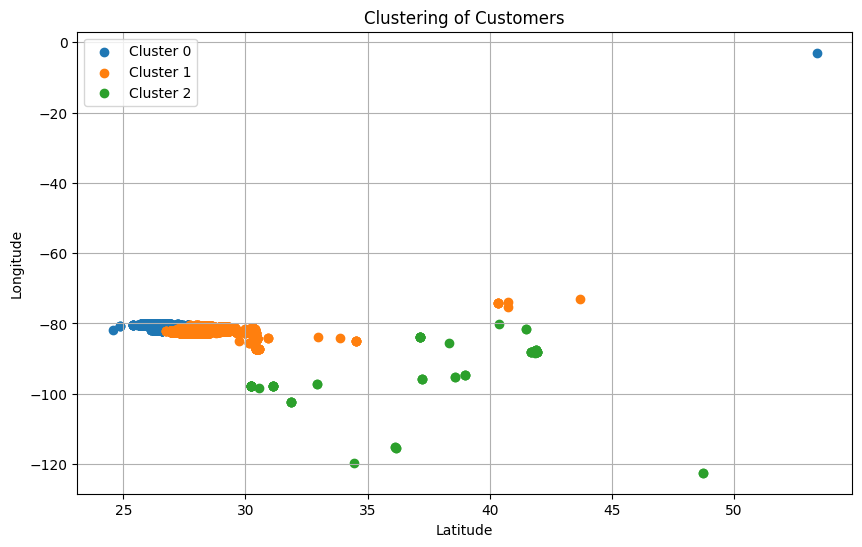

In [12]:
# Preprocessing
selected_features = ['Latitude', 'Longitude']
X = extracted_df[selected_features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform KMeans clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the DataFrame
extracted_df['Cluster'] = clusters

# Define Cluster 1 (Commercial) and Cluster 2 (Residential)
cluster1 = extracted_df[extracted_df['Cluster'] == 1]
cluster2 = extracted_df[extracted_df['Cluster'] == 2]

# Visualize clusters
plt.figure(figsize=(10, 6))

# Scatter plot for each cluster
for cluster_id in range(num_clusters):
    cluster = extracted_df[extracted_df['Cluster'] == cluster_id]
    plt.scatter(cluster['Latitude'], cluster['Longitude'], label=f'Cluster {cluster_id}')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Clustering of Customers')
plt.legend()
plt.grid(True)
plt.show()

Cluster 0 represents one segment, Cluster 1 represents another, and Cluster 2 represents the third segment.

In [13]:
# Count occurrences of item categories and customer types in each cluster
summary_df = extracted_df.groupby(['Cluster', 'Job Category']).size().unstack(fill_value=0)
summary_df['Expensive Items'] = extracted_df[extracted_df['Item'] == 'CPU'].groupby('Cluster').size()
summary_df['Inexpensive Items'] = extracted_df[extracted_df['Item'] == 'Desktop'].groupby('Cluster').size()
summary_df['Moderate Value Items'] = extracted_df[extracted_df['Item'] == 'Television'].groupby('Cluster').size()

# Rename the columns for clarity
summary_df.rename(columns={'COMMERCIAL': 'Commercial', 'OTHERS': 'Others', 'RESIDENTIAL': 'Residential'}, inplace=True)
summary_df


Job Category  Commercial  DROP OFF  \
Cluster                              
0                   1034         3   
1                  29710        63   
2                     58         1   

Job Category  Please also send Cert to Chris Bashaw @ cbashaw@vptitle.net  \
Cluster                                                                     
0                                                             0             
1                                                             3             
2                                                             0             

Job Category  Residential  Expensive Items  Inexpensive Items  \
Cluster                                                         
0                      27                5                 38   
1                   11441              321               2542   
2                      11                1                  3   

Job Category  Moderate Value Items  
Cluster                             
0                              NaN  
1                             22.0  
2                              NaN

C:\Users\hp\AppData\Local\Temp\ipykernel_16696\2457382212.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster1['Item'] = cluster1['Item'].str.lower()
C:\Users\hp\AppData\Local\Temp\ipykernel_16696\2457382212.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster2['Item'] = cluster2['Item'].str.lower()


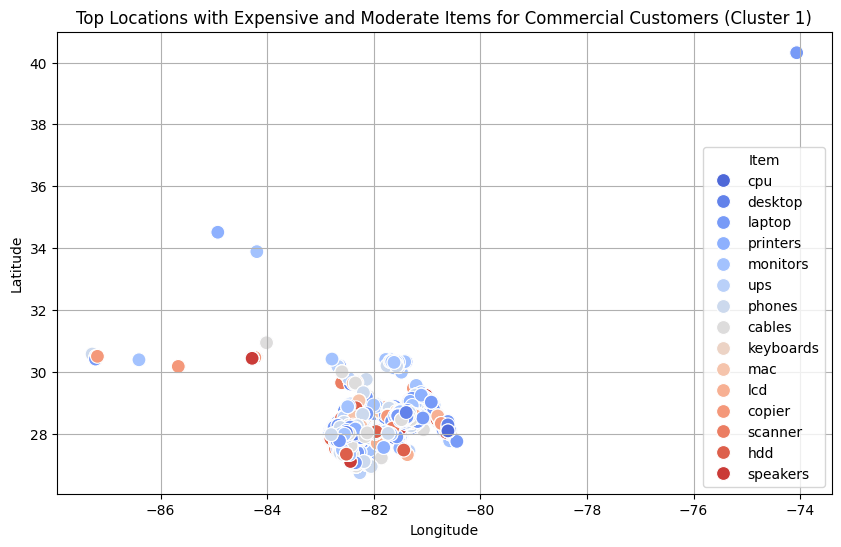

In [14]:
# Clean and standardize item categories
cluster1['Item'] = cluster1['Item'].str.lower()
cluster2['Item'] = cluster2['Item'].str.lower()

# Visualize top locations with expensive and moderate items for Commercial customers (Cluster 1)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', data=cluster1[cluster1['Item'].isin(['laptop', 'monitors', 'printers', 'phones', 'hdd', 'desktop', 'mac', 'keyboards', 'ups', 'lcd', 'scanner', 'cpu', 'cables', 'speakers', 'copier'])], hue='Item', palette='coolwarm', legend='full', s=100)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Top Locations with Expensive and Moderate Items for Commercial Customers (Cluster 1)')
plt.legend(title='Item')
plt.grid(True)
plt.show()


    Forecasting

In [ ]:
import plotly.express as px

# Define Cluster 1 (Commercial) and Cluster 2 (Residential)
cluster1 = extracted_df[extracted_df['Cluster'] == 1]

# Filter data for expensive and moderate items in cluster1
expensive_moderate_items = cluster1[cluster1['Job Category'] == 'COMMERCIAL']

# Check if there are any data points
if not expensive_moderate_items.empty:
    # Create an interactive heatmap using Plotly
    fig = px.scatter_mapbox(expensive_moderate_items,
                            lat="Latitude",
                            lon="Longitude",
                            hover_name="Job Category",  # Adjusted to a valid column name
                            hover_data={"Job Category": True, "Latitude": False, "Longitude": False},
                            color="Job Category",  # Adjusted to a valid column name
                            zoom=10)
    fig.update_layout(mapbox_style="open-street-map")
    fig.update_layout(title='Top Locations with Expensive and Moderate Items for Commercial Customers (Cluser 1)')
    fig.show()
else:
    print("No data points found for expensive and moderate items in Cluster 1.")


C:\Users\hp\AppData\Local\Temp\ipykernel_16696\3922611212.py:15: DeprecationWarning: *scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.scatter_mapbox(expensive_moderate_items,


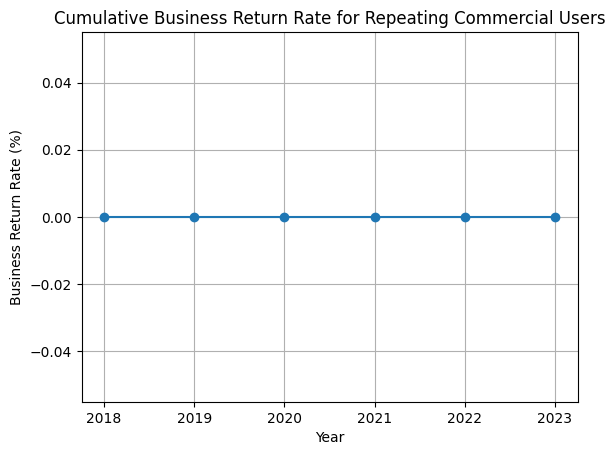

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Pickup Date' to datetime if not already
extracted_df['Pickup Date'] = pd.to_datetime(extracted_df['Pickup Date'])

# Extract year from 'Pickup Date'
extracted_df['Year'] = extracted_df['Pickup Date'].dt.year

# Group by year and count unique customers
customers_per_year = extracted_df.groupby('Year')['Contact Name'].nunique()

# Calculate the total customers for each year
total_customers_per_year = customers_per_year.cumsum()

# Group by year and count repeat customers
repeat_customers_per_year = extracted_df.groupby('Year')['Contact Name'].apply(lambda x: x.nunique() - x.nunique(dropna=True))

# Calculate the return rate (%) for each year
return_rate_per_year = (repeat_customers_per_year / total_customers_per_year) * 100

# Plot the graph
plt.plot(return_rate_per_year.index, return_rate_per_year.values, marker='o')
plt.title('Cumulative Business Return Rate for Repeating Commercial Users')
plt.xlabel('Year')
plt.ylabel('Business Return Rate (%)')
plt.xticks(return_rate_per_year.index)
plt.grid(True)
plt.show()


In [17]:
import pandas as pd
import numpy as np

# Generate simulated pickup data for demonstration
np.random.seed(0)  # For reproducibility
dates = pd.date_range(start='2023-01-01', end='2024-12-31', freq='D')
pickups = np.random.randint(50, 200, size=len(dates))

# Create DataFrame
extracted_df = pd.DataFrame({'Pickup Date': dates, 'Pickups': pickups})

# Print the first few rows of the DataFrame
print(extracted_df.head())


  Pickup Date  Pickups
0  2023-01-01       97
1  2023-01-02      167
2  2023-01-03      117
3  2023-01-04      153
4  2023-01-05       59


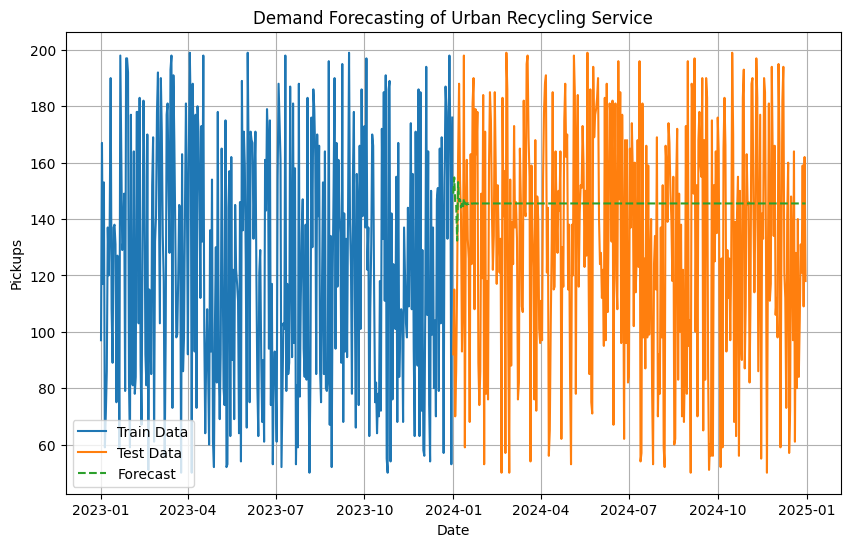

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Convert 'Pickup Date' to datetime if not already
extracted_df['Pickup Date'] = pd.to_datetime(extracted_df['Pickup Date'])

# Create a time series DataFrame
ts_df = extracted_df.set_index('Pickup Date')['Pickups']

# Perform data resampling to get daily pickups
daily_ts = ts_df.resample('D').sum()

# Split data into train and test sets
train_data = daily_ts.loc[:'2023-12-31']
test_data = daily_ts.loc['2024-01-01':]

# Train ARIMA model
model = ARIMA(train_data, order=(5,1,0))
fitted_model = model.fit()

# Forecast demand
forecast = fitted_model.forecast(steps=len(test_data))

# Plot actual vs forecasted demand
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(test_data.index, forecast, label='Forecast', linestyle='--')
plt.title('Demand Forecasting of Urban Recycling Service')
plt.xlabel('Date')
plt.ylabel('Pickups')
plt.legend()
plt.grid(True)
plt.show()


Utilizing ARIMA model to perform demand forecasting for urban recycling services. This involves analyzing historical pickup data to capture trends, seasonality, and temporal dependencies, enabling the model to make accurate predictions of future pickup demand. By fitting the ARIMA model to the historical data and forecasting future demand, we aim to optimize resource allocation and operational planning for urban recycling services.